In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
!pip install matplotlib --upgrade
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Machine learning libary
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Deployment
import anvil.server
anvil.server.connect("FUNM2NCX5UQICRE66WSMLD4R-YIIB2FCSYEXHJSQL")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [ ]:
duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
#Random Forest Feature Selection
Y = data['Diabetes_binary']
X = data.drop('Diabetes_binary', axis = 1)
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=10)
x, y = sm.fit_resample(X, Y)

X_train , X_test , Y_train , Y_test = train_test_split(x,y, test_size=0.2 , random_state=42)
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
rf.fit(X_train, Y_train)
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
rf_features=list(feature[feature>0.025].index)
rf_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.1s finished


['HighBP',
 'GenHlth',
 'HighChol',
 'BMI',
 'Age',
 'Income',
 'Education',
 'DiffWalk',
 'Sex',
 'PhysActivity',
 'Smoker',
 'PhysHlth',
 'HeartDiseaseorAttack',
 'Fruits',
 'MentHlth']

In [ ]:
Y = data['Diabetes_binary']
X = data[rf_features]

In [ ]:
rf_features

['HighBP',
 'GenHlth',
 'HighChol',
 'BMI',
 'Age',
 'Income',
 'Education',
 'DiffWalk',
 'Sex',
 'PhysActivity',
 'Smoker',
 'PhysHlth',
 'HeartDiseaseorAttack',
 'Fruits',
 'MentHlth']

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=10)
x, y = sm.fit_resample(X, Y)
X_train , X_test , Y_train , Y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [ ]:
best_model = LGBMClassifier(reg_alpha = 0.01, num_leaves = 60, min_child_samples = 15, max_depth = -1, learning_rate =  0.1)
best_model.fit(X_train,Y_train)
Y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision_positive = metrics.precision_score(Y_test, Y_pred, pos_label=1)
precision_negative = metrics.precision_score(Y_test, Y_pred, pos_label=0)
recall_sensitivity = metrics.recall_score(Y_test, Y_pred, pos_label=1)
recall_specificity = metrics.recall_score(Y_test, Y_pred, pos_label=0)
f1_positive = metrics.f1_score(Y_test, Y_pred, pos_label=1)
f1_negative = metrics.f1_score(Y_test, Y_pred, pos_label=0)


In [ ]:
evaluation_tuning = pd.DataFrame({'Model': ['LightGBM'],
                           'Accuracy': accuracy,
                           'Precision Positive': precision_positive,
                           'Precision Negative': precision_negative,
                           'Recall Sensitivity': recall_sensitivity,
                           'Recall Specitivity': recall_specificity,
                           'F1 Positive': f1_positive,
                           'F1 Negative': f1_negative
                           })

# no feature selection + NM + Standard Scaler
evaluation_tuning

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,LightGBM,0.90975,0.968671,0.864129,0.846629,0.972695,0.903548,0.915203


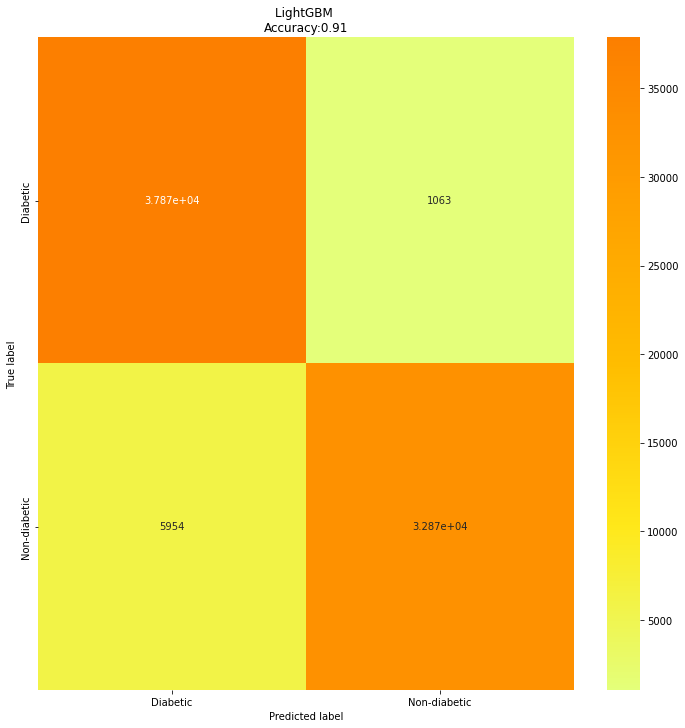

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['Diabetic', 'Non-diabetic' ],
                     columns = ['Diabetic', 'Non-diabetic'])

plt.figure(figsize=(12,12))
sns.heatmap(cm_df, cmap = 'Wistia', annot=True, fmt='.4g')
plt.title('LightGBM \nAccuracy:{0:.2f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
evaluation_tuning.iloc[0]

Model                 LightGBM
Accuracy               0.90975
Precision Positive    0.968671
Precision Negative    0.864129
Recall Sensitivity    0.846629
Recall Specitivity    0.972695
F1 Positive           0.903548
F1 Negative           0.915203
Name: 0, dtype: object

In [ ]:
l1 = ['Accuracy', 'Precision Positive','Precision Negative','Recall Sensitivity','Recall Specitivity','F1 Positive','F1 Negative']
l2 = [ accuracy, precision_positive, precision_negative, recall_sensitivity, recall_specificity, f1_positive, f1_negative ]

evaluation_vis = pd.DataFrame(list(zip(l1, l2)))
evaluation_vis.columns = ['Metrics', 'Score']
evaluation_vis

,Metrics,Score
0,Accuracy,0.909750
1,Precision Positive,0.968671
2,Precision Negative,0.864129
3,Recall Sensitivity,0.846629
4,Recall Specitivity,0.972695
5,F1 Positive,0.903548
6,F1 Negative,0.915203


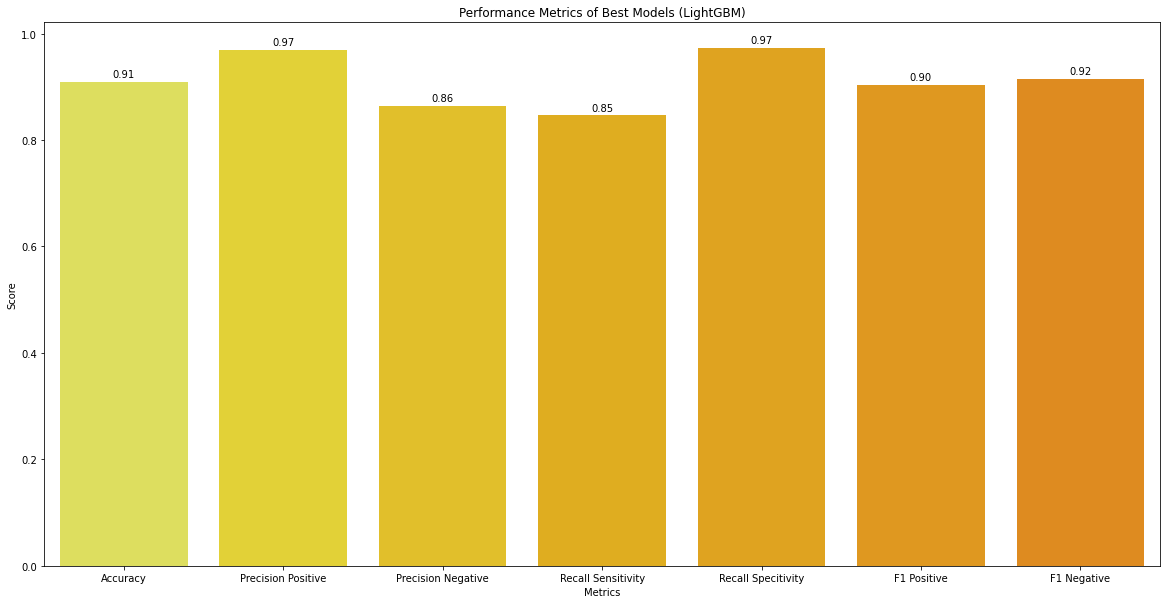

In [ ]:
plt.figure(figsize=(20, 10))
#sns.color_palette("ch:start=.2,rot=.3", as_cmap=True)
ax = sns.barplot(x="Metrics", y="Score", data=evaluation_vis, palette = "Wistia" )
plt.title('Performance Metrics of Best Models (LightGBM)')

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

show_values(ax)
plt.show()

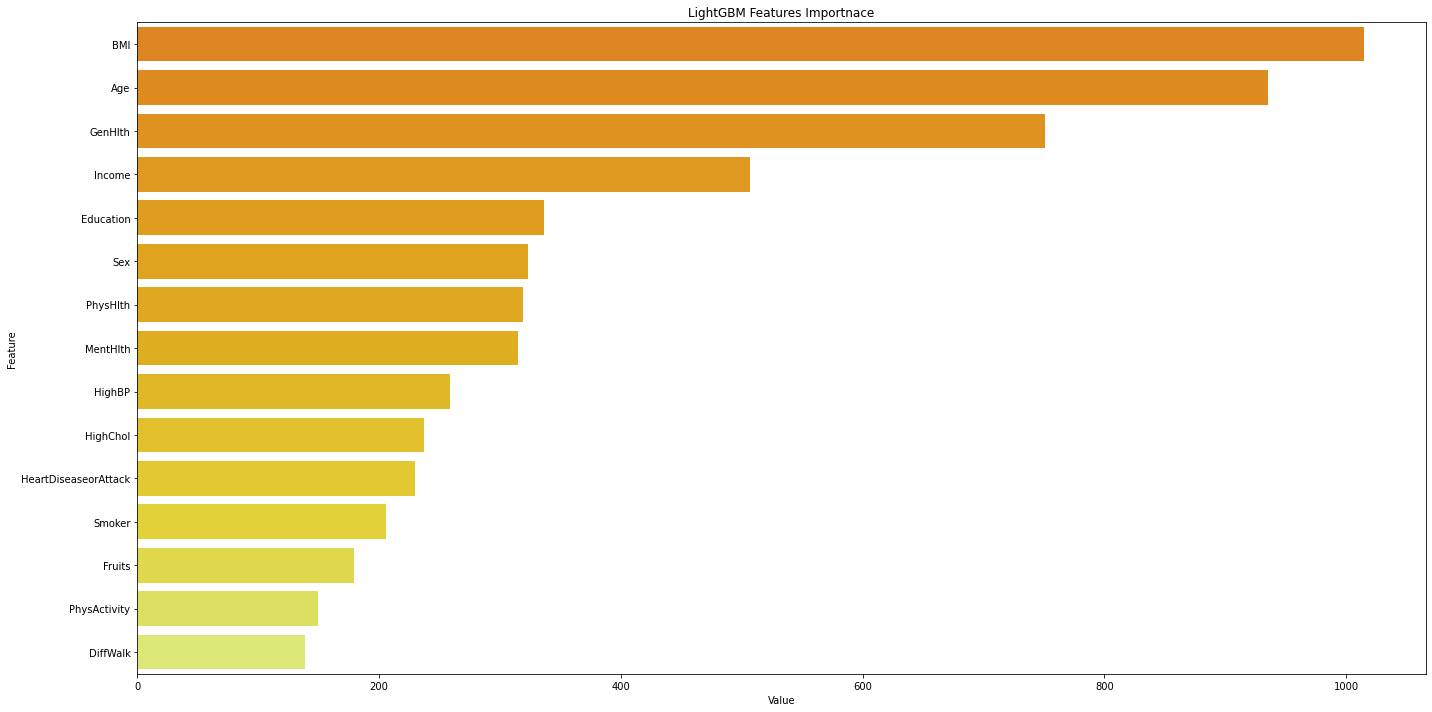

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(best_model.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
#sns.color_palette("ch:start=.2,rot=.3", as_cmap=True)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), palette = "Wistia_r" )
plt.title('LightGBM Features Importnace')
plt.tight_layout()
plt.show()

In [ ]:
@anvil.server.callable
def predict_diabetes(highbp, genhlth, highchol, bmi, age, income, edu, sex, diffwalk, physact, hdoa, smoker, physhlth, fruit, menhlth):
  a = best_model.predict([[highbp, genhlth, highchol, bmi, age, income, edu, sex, diffwalk, physact, hdoa, smoker, physhlth, fruit, menhlth]])
  return a

anvil.server.wait_forever()